# The Battle of Neighborhoods

#### Applied Data Science Capstone by IBM/Coursera

# Introduction/Business Problem

A Food Company from Newyork wants to expand their restaurant business to San Francisco, California. They want to find the best place to start their business, which is suitable for the Indian restaurant. But San Francisco has so many Indian restaurants, so this company wants Data Scientist to find the Best location for their business which is near to famous attraction/location and which will be profitable to the company.


According to www.foodnewsfeed.com

8 Factors for Choosing a New Restaurant Location are:

1. Visibility
2. Parking
3. Space Size
4. Crime Rates
5. Surrounding Businesses and Competitor Analysis
6. Accessibility
7. Affordability
8. Safety


# Data

Using the database of the City and County of San Francisco's data (datasf.org) for the analyze. Database- Police Department Incident Reports: 2018 to Present and San Francisco Historical Secured Property Tax Rolls 2007–2015.

#### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
%matplotlib inline


### Crime Data Analysis 

### Download and Explore Dataset

In [2]:
# The code was removed by Watson Studio for sharing.

In [3]:
df_data_1 = pd.read_csv(body)
df_data_1.head()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,point
0,2018/07/18 01:30:00 PM,2018/07/18,13:30,2018,Wednesday,2018/07/18 01:31:00 PM,69250964070,692509,180536729,182001522.0,...,Suspicious Occurrence,Unfounded,NaN,NaN,Out of SF,NaN,NaN,NaN,NaN,NaN
1,2019/04/08 05:25:00 AM,2019/04/08,05:25,2019,Monday,2019/04/13 01:34:00 PM,79165671000,791656,196076240,NaN,...,Lost Property,Open or Active,NaN,NaN,Out of SF,NaN,NaN,NaN,NaN,NaN
2,2019/06/05 02:00:00 PM,2019/06/05,14:00,2019,Wednesday,2019/06/05 02:30:00 PM,81006072000,810060,190416337,191610728.0,...,Found Property,Open or Active,FRANKLIN ST \ EDDY ST,25191000.0,Northern,Western Addition,5.0,37.782685,-122.422464,"(37.78268536745206, -122.42246374465972)"
3,2019/04/16 08:20:00 PM,2019/04/16,20:20,2019,Tuesday,2019/04/17 12:21:00 AM,79171306244,791713,196076024,NaN,...,"Theft, From Locked Vehicle, >$950",Open or Active,NaN,NaN,Central,NaN,NaN,NaN,NaN,NaN
4,2019/06/10 11:00:00 AM,2019/06/10,11:00,2019,Monday,2019/06/10 11:00:00 AM,81012372000,810123,190393440,191521989.0,...,Found Property,Open or Active,ANZA ST \ 06TH AVE,27275000.0,Richmond,Inner Richmond,1.0,37.779091,-122.464145,"(37.779090726308574, -122.46414497098554)"


### Data pre-processing and selection

In [4]:
pd.set_option('display.max_columns', 100)
df_data_1.head()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,point
0,2018/07/18 01:30:00 PM,2018/07/18,13:30,2018,Wednesday,2018/07/18 01:31:00 PM,69250964070,692509,180536729,182001522.0,II,Initial,NaN,64070,Suspicious Occ,Suspicious Occ,Suspicious Occurrence,Unfounded,NaN,NaN,Out of SF,NaN,NaN,NaN,NaN,NaN
1,2019/04/08 05:25:00 AM,2019/04/08,05:25,2019,Monday,2019/04/13 01:34:00 PM,79165671000,791656,196076240,NaN,II,Coplogic Initial,True,71000,Lost Property,Lost Property,Lost Property,Open or Active,NaN,NaN,Out of SF,NaN,NaN,NaN,NaN,NaN
2,2019/06/05 02:00:00 PM,2019/06/05,14:00,2019,Wednesday,2019/06/05 02:30:00 PM,81006072000,810060,190416337,191610728.0,II,Initial,NaN,72000,Non-Criminal,Non-Criminal,Found Property,Open or Active,FRANKLIN ST \ EDDY ST,25191000.0,Northern,Western Addition,5.0,37.782685,-122.422464,"(37.78268536745206, -122.42246374465972)"
3,2019/04/16 08:20:00 PM,2019/04/16,20:20,2019,Tuesday,2019/04/17 12:21:00 AM,79171306244,791713,196076024,NaN,II,Coplogic Initial,True,6244,Larceny Theft,Larceny - From Vehicle,"Theft, From Locked Vehicle, >$950",Open or Active,NaN,NaN,Central,NaN,NaN,NaN,NaN,NaN
4,2019/06/10 11:00:00 AM,2019/06/10,11:00,2019,Monday,2019/06/10 11:00:00 AM,81012372000,810123,190393440,191521989.0,IS,Initial Supplement,NaN,72000,Non-Criminal,Non-Criminal,Found Property,Open or Active,ANZA ST \ 06TH AVE,27275000.0,Richmond,Inner Richmond,1.0,37.779091,-122.464145,"(37.779090726308574, -122.46414497098554)"


In [5]:
columns = ['Incident Datetime', 'Incident Day of Week', 'Incident Year', 
           'Report Datetime', 'Row ID', 'Incident ID', 'CAD Number', 'Report Type Code', 
           'Report Type Description', 'Filed Online', 'Incident Code', 'Incident Subcategory', 
           'Incident Description', 'Intersection', 'CNN', 'Analysis Neighborhood', 
           'Supervisor District', 'Resolution', 'point']
df_data_1 = df_data_1.drop(columns, axis=1)

df_data_1.isnull().sum()

df_data_1.dropna(inplace=True)
df_data_1.isnull().sum()

df_data_1['Incident Category'].unique()

df_data_1 = df_data_1[df_data_1['Incident Category'] != 'Non-Criminal'].reset_index(drop=True)




### Plot the Data

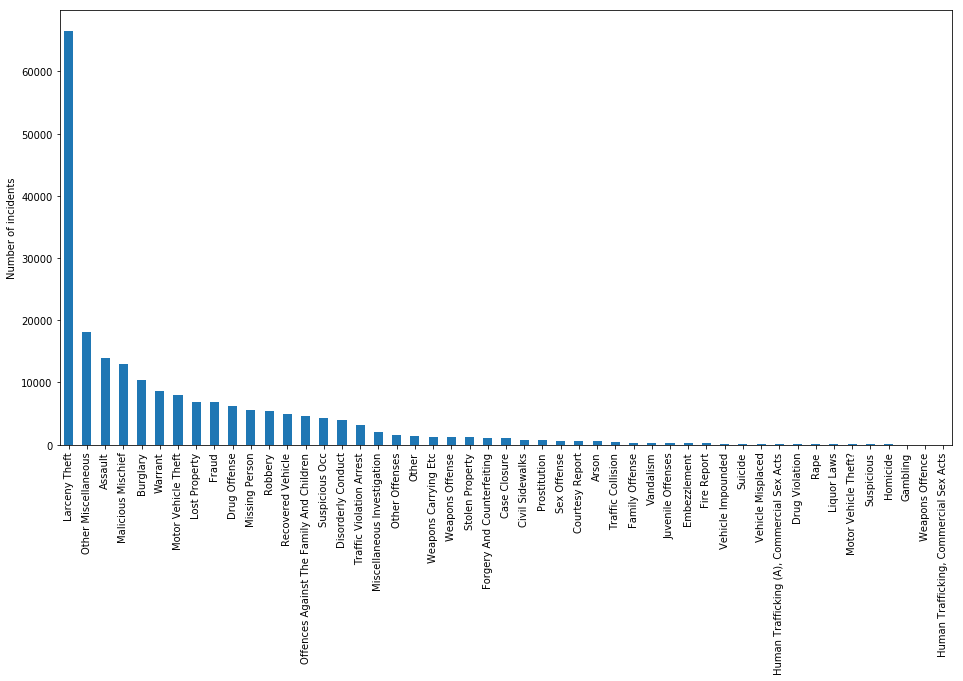

In [6]:
df_data_1['Incident Category'].value_counts().plot(kind='bar', figsize=(16,8))
plt.ylabel('Number of incidents')
plt.show()

### Calculating Total Number Of Incidents Per District

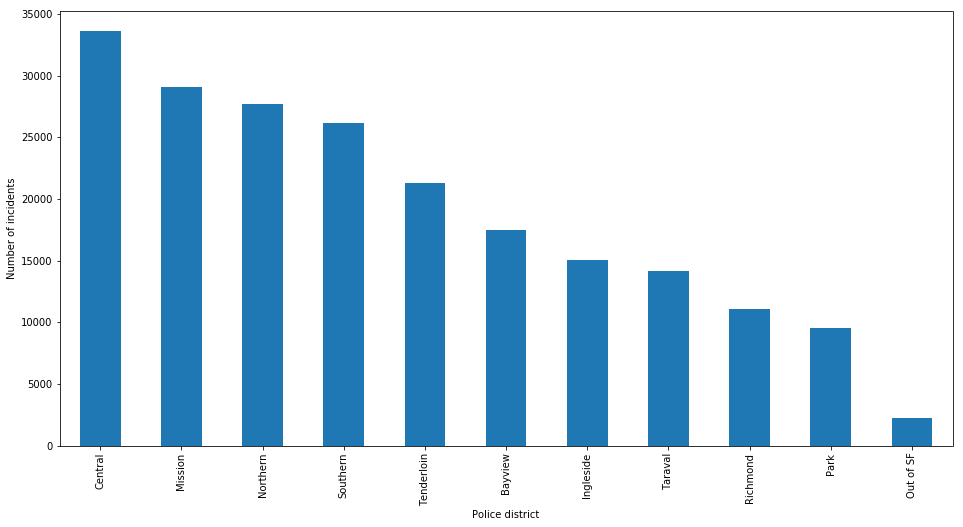

In [7]:

crimedata_district = pd.DataFrame(df_data_1['Police District'].value_counts().astype(float))
crimedata_district = crimedata_district.reset_index()
crimedata_district.columns = ['District', 'Number']
crimedata_district.plot(kind='bar', figsize=(16,8), legend=None)
xticks = [i for i in range(len(crimedata_district))]
plt.xticks(xticks, list(crimedata_district['District']))
plt.xlabel('Police district')
plt.ylabel('Number of incidents')
plt.show()

Central Police District has the most number of incidents.

### install geopandas and importing the modules

In [8]:
!conda install geopandas
import geopandas as gpd
from shapely.geometry import Point
from geopandas.tools import sjoin
from geopandas import GeoDataFrame
import fiona; help(fiona.open)

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libdap4-3.19.1             |       h6ec2957_0         1.5 MB
    rtree-0.8.3                |           py36_0          46 KB
    json-c-0.13.1              |       h1bed415_0          70 KB
    descartes-1.1.0            |             py_3           9 KB
    xerces-c-3.2.2             |       h780794e_0         3.2 MB
    libspatialindex-1.8.5      |       h20b78c2_2         666 KB
    gdal-2.3.3                 |   py36hbb2a789_0         1.3 MB
    openjpeg-2.3.0             |       h05c96fa_1         456 KB
    geos-3.7.1                 |       he6710b0_0         1.6 MB
    pyproj-1.9.6               |   py36h14380d9_0          76 KB
    geopandas-0.4.1            |             py_0         891 KB


In [9]:
geo = gpd.GeoSeries(df_data_1.apply(lambda z: Point(z['Longitude'], z['Latitude']), 1), crs={'init': 'epsg:4326'})

#### Convert DataFrame into GeoDataFrame.

In [10]:
df_data_1 = gpd.GeoDataFrame(df_data_1, geometry=geo)
df_data_1.head()

,Incident Date,Incident Time,Incident Number,Incident Category,Police District,Latitude,Longitude,geometry
0,2019/06/10,18:57,190417987,Assault,Tenderloin,37.784449,-122.416072,POINT (-122.4160717362336 37.78444884061359)
1,2019/06/10,01:30,190416070,Assault,Ingleside,37.723168,-122.442554,POINT (-122.4425536631843 37.7231683135138)
2,2019/06/09,23:08,190418264,Malicious Mischief,Central,37.792487,-122.405654,POINT (-122.4056543388906 37.79248657771051)
3,2019/06/03,13:15,190398365,Larceny Theft,Park,37.770964,-122.431904,POINT (-122.431904325098 37.77096442475283)
4,2019/06/08,02:15,196111852,Larceny Theft,Park,37.765323,-122.443538,POINT (-122.4435383075602 37.76532273064809)


In [11]:

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about your possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
streaming_body_1 = client_d574569d7efe490ebce3c90391d2f789.get_object(Bucket='thebattleofneighborhoodsweek2-donotdelete-pr-nsipoc1n0df9ed', Key='Realtor Neighborhoods.geojson')['Body']
# add missing __iter__ method so pandas accepts body as file-like object
if not hasattr(streaming_body_1, "__iter__"): streaming_body_1.__iter__ = types.MethodType( __iter__, streaming_body_1 ) 



In [12]:
nbrh = gpd.read_file(streaming_body_1)

In [13]:
nbrh.head()

,nbrhood,nid,sfar_distr,geometry
0,Alamo Square,6e,District 6 - Central North,(POLYGON ((-122.4294839489174 37.7750962307043...
1,Anza Vista,6a,District 6 - Central North,(POLYGON ((-122.4474643913587 37.7798633530923...
2,Balboa Terrace,4a,District 4 - Twin Peaks West,(POLYGON ((-122.464508862148 37.73220849554402...
3,Bayview,10a,District 10 - Southeast,"(POLYGON ((-122.38758527039 37.7502633777501, ..."
4,Bernal Heights,9a,District 9 - Central East,(POLYGON ((-122.4037549223623 37.7491900637356...


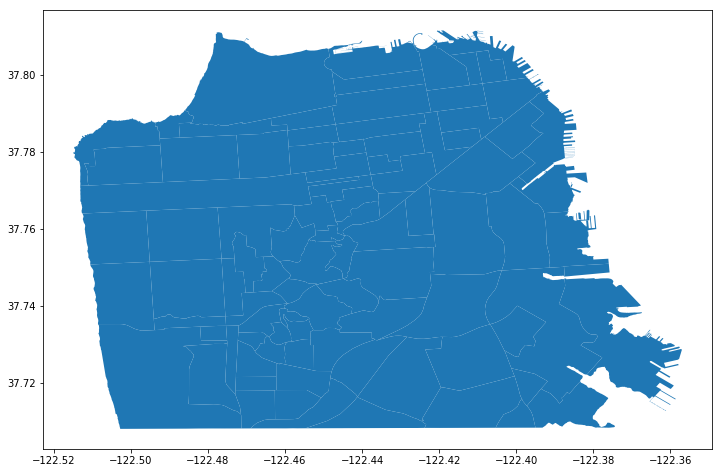

In [14]:
nbrh.plot(figsize=(12,14))
plt.show()

####  Calculate the number of crimes in each neighborhood

In [15]:
nbh_crime_counts = gpd.tools.sjoin(df_data_1.to_crs(nbrh.crs), nbrh, how="inner", op='intersects').groupby('nbrhood').size()
nbh_crime_counts = pd.DataFrame(data=nbh_crime_counts.reset_index())
nbh_crime_counts.columns=['nbrhood', 'incident_counts']
nbh_crime_counts.head()

,nbrhood,incident_counts
0,Alamo Square,1331
1,Anza Vista,575
2,Balboa Terrace,105
3,Bayview,6744
4,Bayview Heights,544


#### Using the Merge Function combining the two DataFrames

In [16]:
nbrh = nbrh.merge(nbh_crime_counts, on='nbrhood')
nbrh.head()

,nbrhood,nid,sfar_distr,geometry,incident_counts
0,Alamo Square,6e,District 6 - Central North,(POLYGON ((-122.4294839489174 37.7750962307043...,1331
1,Anza Vista,6a,District 6 - Central North,(POLYGON ((-122.4474643913587 37.7798633530923...,575
2,Balboa Terrace,4a,District 4 - Twin Peaks West,(POLYGON ((-122.464508862148 37.73220849554402...,105
3,Bayview,10a,District 10 - Southeast,"(POLYGON ((-122.38758527039 37.7502633777501, ...",6744
4,Bernal Heights,9a,District 9 - Central East,(POLYGON ((-122.4037549223623 37.7491900637356...,3173


### Housing Data Analysis

In [17]:

body = client_d574569d7efe490ebce3c90391d2f789.get_object(Bucket='thebattleofneighborhoodsweek2-donotdelete-pr-nsipoc1n0df9ed',Key='Historic_Secured_Property_Tax_Rolls.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)



/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Data pre-processing and selection

In [18]:
columns = ['Block and Lot Number', 
           'Closed Roll Assessed Fixtures Value',
           'Closed Roll Assessed Improvement Value',
           'Closed Roll Assessed Land Value',
           'Closed Roll Assessed Personal Prop Value', 'Neighborhoods - Analysis Boundaries',
           'Location']

In [19]:
df_housing = df_data_2[df_data_2['Closed Roll Fiscal Year']==2014.0].loc[:,columns].reset_index(drop=True)

In [20]:
df_housing.isnull().sum()
df_housing.dropna(inplace=True)
df_housing.isnull().sum()

Block and Lot Number                        0
Closed Roll Assessed Fixtures Value         0
Closed Roll Assessed Improvement Value      0
Closed Roll Assessed Land Value             0
Closed Roll Assessed Personal Prop Value    0
Neighborhoods - Analysis Boundaries         0
Location                                    0
dtype: int64

In [21]:
df_housing['total_price'] = df_housing['Closed Roll Assessed Fixtures Value'] + \
                            df_housing['Closed Roll Assessed Improvement Value'] + \
                            df_housing['Closed Roll Assessed Land Value'] + \
                            df_housing['Closed Roll Assessed Personal Prop Value']

In [22]:
df_housing.head()

,Block and Lot Number,Closed Roll Assessed Fixtures Value,Closed Roll Assessed Improvement Value,Closed Roll Assessed Land Value,Closed Roll Assessed Personal Prop Value,Neighborhoods - Analysis Boundaries,Location,total_price
0,3751435,0.0,149168.0,149168.0,0.0,South of Market,"(37.7816504619473, -122.399116945614)",298336.0
2,6276009,0.0,270000.0,405000.0,0.0,Excelsior,"(37.7190514589638, -122.433999199176)",675000.0
3,3751420,0.0,128078.0,128078.0,0.0,South of Market,"(37.7816504619473, -122.399116945614)",256156.0
4,7517378,0.0,129545.0,141594.0,0.0,Noe Valley,"(37.7463212609468, -122.441519528492)",271139.0
5,3735098,0.0,336716.0,336716.0,0.0,Financial District/South Beach,"(37.7857477114134, -122.397398669759)",673432.0


In [23]:
coordinates = df_housing['Location'].str.strip('()')                                \
                                    .str.split(', ', expand=True)                   \
                                    .rename(columns={0:'Latitude', 1:'Longitude'}) 

In [24]:
columns = list(df_housing.columns) + list(coordinates.columns)
df_housing = pd.concat([df_housing, coordinates], axis=1, ignore_index=True)
df_housing.columns = columns
df_housing = df_housing.drop(columns=['Closed Roll Assessed Fixtures Value',
                                      'Closed Roll Assessed Improvement Value',
                                      'Closed Roll Assessed Land Value',
                                      'Closed Roll Assessed Personal Prop Value',
                                      'Location'])

In [25]:
df_housing[['Latitude','Longitude']] = df_housing[['Latitude','Longitude']].apply(pd.to_numeric)

In [26]:
df_housing.head()

,Block and Lot Number,Neighborhoods - Analysis Boundaries,total_price,Latitude,Longitude
0,3751435,South of Market,298336.0,37.781650,-122.399117
2,6276009,Excelsior,675000.0,37.719051,-122.433999
3,3751420,South of Market,256156.0,37.781650,-122.399117
4,7517378,Noe Valley,271139.0,37.746321,-122.441520
5,3735098,Financial District/South Beach,673432.0,37.785748,-122.397399


In [27]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204319 entries, 0 to 206815
Data columns (total 5 columns):
Block and Lot Number                   204319 non-null object
Neighborhoods - Analysis Boundaries    204319 non-null object
total_price                            204319 non-null float64
Latitude                               204319 non-null float64
Longitude                              204319 non-null float64
dtypes: float64(3), object(2)
memory usage: 9.4+ MB


#### Convert DataFrame into GeoDataFrame.

In [28]:
geo_housing = gpd.GeoSeries(df_housing.apply(lambda z: Point(z['Longitude'], z['Latitude']), 1), crs={'init': 'epsg:4326'})
df_housing = gpd.GeoDataFrame(df_housing, geometry=geo_housing)
df_housing.head()

,Block and Lot Number,Neighborhoods - Analysis Boundaries,total_price,Latitude,Longitude,geometry
0,3751435,South of Market,298336.0,37.781650,-122.399117,POINT (-122.399116945614 37.7816504619473)
2,6276009,Excelsior,675000.0,37.719051,-122.433999,POINT (-122.433999199176 37.7190514589638)
3,3751420,South of Market,256156.0,37.781650,-122.399117,POINT (-122.399116945614 37.7816504619473)
4,7517378,Noe Valley,271139.0,37.746321,-122.441520,POINT (-122.441519528492 37.7463212609468)
5,3735098,Financial District/South Beach,673432.0,37.785748,-122.397399,POINT (-122.397398669759 37.7857477114134)


#### Calculate average housing value in each neighborhood

In [29]:
nbh_house_avg_value = gpd.tools.sjoin(df_housing.to_crs(nbrh.crs), nbrh, how="inner", op='intersects').groupby('nbrhood').mean()
nbh_house_avg_value = pd.DataFrame(data=nbh_house_avg_value.reset_index())
nbh_house_avg_value = nbh_house_avg_value.drop(columns=['Latitude', 'Longitude', 'index_right', 'incident_counts'])
nbh_house_avg_value.columns=['nbrhood', 'house_avg_price']

#### Normalize the price

In [30]:
nbh_house_avg_value['house_avg_price'] = nbh_house_avg_value['house_avg_price'] / 1_000_000
nbh_house_avg_value.head()

,nbrhood,house_avg_price
0,Alamo Square,0.862016
1,Anza Vista,1.121534
2,Balboa Terrace,0.737963
3,Bayview,0.439684
4,Bayview Heights,0.296895


#### Using the Merge Function combining the two DataFrames

In [31]:
nbrh = nbrh.merge(nbh_house_avg_value, on='nbrhood')
nbrh.head()

,nbrhood,nid,sfar_distr,geometry,incident_counts,house_avg_price
0,Alamo Square,6e,District 6 - Central North,(POLYGON ((-122.4294839489174 37.7750962307043...,1331,0.862016
1,Anza Vista,6a,District 6 - Central North,(POLYGON ((-122.4474643913587 37.7798633530923...,575,1.121534
2,Balboa Terrace,4a,District 4 - Twin Peaks West,(POLYGON ((-122.464508862148 37.73220849554402...,105,0.737963
3,Bayview,10a,District 10 - Southeast,"(POLYGON ((-122.38758527039 37.7502633777501, ...",6744,0.439684
4,Bernal Heights,9a,District 9 - Central East,(POLYGON ((-122.4037549223623 37.7491900637356...,3173,0.448200


### Folium Maps - Crime and Housing price maps of San Francisco

In [32]:
!conda install -c conda-forge folium
import folium
import requests

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge
    folium-0.10.0              |             py_0          59 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    altair-3.1.0               |           py36_0         724 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.2 MB

The following NEW packages will be INSTAL

In [33]:
#nbh_centroid = pd.DataFrame(nbrh.centroid)
nbh_centroid = pd.DataFrame(nbrh.representative_point())
nbh_centroid.columns=(['centroid'])
nbh_centroid['nbrhood'] = nbrh['nbrhood']
nbh_centroid['incident_counts'] = nbrh['incident_counts']
nbh_centroid['house_avg_price'] = nbrh['house_avg_price']

lat = []
lng = []
for index, row in nbh_centroid.iterrows():
    tmp = str(row[0]).strip('POINT ()').split(' ')
    lng.append(float(tmp[0]))
    lat.append(float(tmp[1]))
    #print(tmp[0], tmp[1])
    
nbh_centroid['Latitude'] = lat
nbh_centroid['Longitude'] = lng

nbh_centroid = nbh_centroid.drop(columns=['centroid'])

nbh_centroid.head()

,nbrhood,incident_counts,house_avg_price,Latitude,Longitude
0,Alamo Square,1331,0.862016,37.776076,-122.433919
1,Anza Vista,575,1.121534,37.780611,-122.443255
2,Balboa Terrace,105,0.737963,37.730649,-122.468267
3,Bayview,6744,0.439684,37.732391,-122.387170
4,Bernal Heights,3173,0.448200,37.740230,-122.415885


#### Create Popups in Maps

In [34]:
def get_popups(df, field, name, map_object):
    for lat, lng, nbrhood, value in zip( df['Latitude'], 
                                         df['Longitude'], 
                                         df['nbrhood'], 
                                         df[field]
                                       ):
        label = ("{0}, {1}: {2:.2f}").format(nbrhood, name, value)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=2,
            popup=label,
            color='green',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.3).add_to(map_object)

#### San Francisco Crime Map

In [35]:
SF_crime_map = folium.Map(location=(37.7792808, -122.4192363), zoom_start=13)


# Crime data at the census tract level
SF_crime_map.choropleth(geo_data        = nbrh.to_json(),
                        data            = nbrh,
                        columns         = ['nbrhood', 'incident_counts'], 
                        key_on          = 'feature.properties.nbrhood',
                        fill_color      = 'YlOrRd', 
                        fill_opacity    = 0.60, 
                        line_opacity    = 0.60,
                        legend_name     = 'Number of incidents',
                        name            = 'Number of Incidents',
                        
                                  reset = True                             
                       )

get_popups(nbh_centroid, 'incident_counts', 'Incident Counts', SF_crime_map)

SF_crime_map # Display SF crime_map

/opt/conda/envs/Python36/lib/python3.6/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


#### San Francisco Housing Price Map

In [36]:
# Create San Francisco base map
SF_housing_map = folium.Map(location=(37.7792808, -122.4192363), zoom_start=12)

SF_housing_map.choropleth(geo_data        = nbrh.to_json(),
                          data            = nbrh,
                          columns         = ['nbrhood', 'house_avg_price'], 
                          key_on          = 'feature.properties.nbrhood',
                          fill_color      = 'YlOrRd', 
                          fill_opacity    = 0.60, 
                          line_opacity    = 0.60,
                          legend_name     = 'Average Housing Price (Million)',
                          name            = 'Average Housing Price',                          
                          reset           = True
                         )

get_popups(nbh_centroid, 'house_avg_price', 'Avg. House Price (Million)', SF_housing_map)

SF_housing_map # Display SF housing price map

## Use the Foursquare APIs to explore San Francisco neighborhoods and cluster

In [37]:
# The code was removed by Watson Studio for sharing.

#### Set up the FourSquare API call parameters

In [38]:
RADIUS = 500
LIMIT  = 100

Category of the venue FUNCTION

In [39]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Get Nearby Venues FUNCTION

In [40]:
def getNearbyVenues(names, latitudes, longitudes, radius, limit):
    
    venues_check_list = []
    venues_list=[]
    idx = 0
    for name, lat, lng in zip(names, latitudes, longitudes):
        
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        
        num_of_venues_found = len(results)
        if (num_of_venues_found == 0):
            venues_check_list.append(False)
        else:
            venues_check_list.append(True)
        print('{0:4d} Neighborhood: {1:35s}, number of venues found:{2:6d}'.format(idx, name, num_of_venues_found))
        idx = idx + 1


    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['nbrhood', 
                  'nbrhood Latitude', 
                  'nbrhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues, venues_check_list)

In [41]:
nbhs = nbh_centroid.loc[:, 'nbrhood']
latitudes = nbh_centroid.loc[:, 'Latitude']
longitudes = nbh_centroid.loc[:, 'Longitude']


#### Apply the function getNearbyVenues()

In [42]:
SF_venues, SF_venues_check_list = getNearbyVenues(nbhs, latitudes, longitudes, RADIUS, LIMIT)

   0 Neighborhood: Alamo Square                       , number of venues found:    72
   1 Neighborhood: Anza Vista                         , number of venues found:    18
   2 Neighborhood: Balboa Terrace                     , number of venues found:    17
   3 Neighborhood: Bayview                            , number of venues found:    12
   4 Neighborhood: Bernal Heights                     , number of venues found:    39
   5 Neighborhood: Buena Vista Park/Ashbury Heights   , number of venues found:    52
   6 Neighborhood: Central Richmond                   , number of venues found:   100
   7 Neighborhood: Central Sunset                     , number of venues found:    14
   8 Neighborhood: Clarendon Heights                  , number of venues found:    17
   9 Neighborhood: Corona Heights                     , number of venues found:    57
  10 Neighborhood: Cow Hollow                         , number of venues found:   100
  11 Neighborhood: Crocker Amazon                     

#### Print the Unique Categories

In [43]:
print('There are {} uniques categories.'.format(len(SF_venues['Venue Category'].unique())))

There are 351 uniques categories.


#### Use dummies to Categories Venues

In [44]:
SF_venues_dummies = pd.get_dummies(SF_venues[['Venue Category']], prefix="", prefix_sep="")

# add postcode column back to dataframe
SF_venues_dummies['nbrhood'] = SF_venues['nbrhood'] 

# move postcode column to the first column
fixed_columns = [SF_venues_dummies.columns[-1]] + list(SF_venues_dummies.columns[:-1])
SF_venues_dummies = SF_venues_dummies[fixed_columns]

SF_venues_dummies.shape

(3623, 352)

Group rows by neighborhood name and by taking the mean of the frequency of occurrence of each category.

In [45]:
SF_grouped = SF_venues_dummies.groupby('nbrhood').mean().reset_index()
SF_grouped.head()

,nbrhood,ATM,Acai House,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Alternative Healer,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Building,...,Street Food Gathering,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tea Room,Tech Startup,Tennis Court,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Tiki Bar,Tour Provider,Tourist Information Center,Toy / Game Store,Track,Track Stadium,Trade School,Trail,Train Station,Trattoria/Osteria,Tree,Tunnel,Turkish Restaurant,Tuscan Restaurant,Udon Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Video Store,Vietnamese Restaurant,Vineyard,Wagashi Place,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,Alamo Square,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.013889,0.013889,0.0,0.013889,0.0,0.000000,0.0,0.0,0.0,0.027778,0.0,0.0,0.013889,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.027778,0.0,0.0,0.0,0.000000,0.013889,0.013889,0.0,0.0,...,0.0,0.0,0.0,0.0,0.027778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013889,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.013889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.027778,0.0,0.0,0.0,0.0,0.0
1,Anza Vista,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.055556,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,Balboa Terrace,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.058824,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.117647,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,Bayview,0.0,0.0,0.0,0.0,0.0,0.083333,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.083333,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.083333,0.000000,0.083333,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,Bayview Heights,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.166667,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.166667,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


Define return_common_venues FUNCTION

In [46]:
def return_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [47]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['nbrhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
SF_venues_sorted = pd.DataFrame(columns=columns)
SF_venues_sorted['nbrhood'] = SF_grouped['nbrhood']

for ind in np.arange(SF_grouped.shape[0]):
    SF_venues_sorted.iloc[ind, 1:] = return_common_venues(SF_grouped.iloc[ind, :], num_top_venues)

print(SF_venues_sorted.shape)
SF_venues_sorted

(92, 11)


,nbrhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alamo Square,Bar,Record Shop,Cocktail Bar,Mediterranean Restaurant,Gift Shop,Italian Restaurant,Boutique,Sushi Restaurant,Wine Bar,Ethiopian Restaurant
1,Anza Vista,Café,Health & Beauty Service,Coffee Shop,Convenience Store,Arts & Crafts Store,Neighborhood,Southern / Soul Food Restaurant,Big Box Store,Mexican Restaurant,Grocery Store
2,Balboa Terrace,Bubble Tea Shop,Light Rail Station,Vietnamese Restaurant,Thai Restaurant,Circus,Bakery,Pharmacy,Gym,Playground,Comic Shop
3,Bayview,Southern / Soul Food Restaurant,Café,Bakery,African Restaurant,Thrift / Vintage Store,Gym,Light Rail Station,Theater,Park,Filipino Restaurant
4,Bayview Heights,Light Rail Station,Breakfast Spot,Park,Burger Joint,Theme Park,Flower Shop,Event Space,Exhibit,Farmers Market,Fast Food Restaurant
5,Bernal Heights,Park,Coffee Shop,Playground,Bakery,Gourmet Shop,Trail,Italian Restaurant,Burger Joint,New American Restaurant,Liquor Store
6,Buena Vista Park/Ashbury Heights,Park,Boutique,Clothing Store,Convenience Store,Coffee Shop,Trail,Scenic Lookout,Breakfast Spot,Gift Shop,Dog Run
7,Candlestick Point,Football Stadium,Park,Food Truck,Stadium,American Restaurant,Food & Drink Shop,Soccer Field,Campground,Yoga Studio,Filipino Restaurant
8,Central Richmond,Grocery Store,Sushi Restaurant,Chinese Restaurant,Liquor Store,Korean Restaurant,Café,Coffee Shop,Dim Sum Restaurant,Thai Restaurant,Vietnamese Restaurant
9,Central Sunset,Chinese Restaurant,Gym / Fitness Center,Electronics Store,Train Station,Pet Store,Liquor Store,Light Rail Station,Playground,Café,Gymnastics Gym


In [48]:
from folium.plugins import FastMarkerCluster
from shapely.geometry import Point
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors


Grouping into Clusters. 

In [49]:

kclusters = 5

SF_grouped_clustering = SF_grouped.drop('nbrhood', 1)


kmeans = KMeans(n_clusters=kclusters, random_state=34).fit(SF_grouped_clustering)

# Check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2], dtype=int32)

In [50]:
# Create the dataframe
SF_merged = SF_venues_sorted

# Add clustering labels
SF_merged['Cluster Labels'] = kmeans.labels_

# Merge SF_grouped with SF_data to add latitude/longitude for each neighborhood
SF_merged = nbh_centroid.join(SF_venues_sorted.set_index('nbrhood'), on='nbrhood')

SF_merged.head()

,nbrhood,incident_counts,house_avg_price,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
0,Alamo Square,1331,0.862016,37.776076,-122.433919,Bar,Record Shop,Cocktail Bar,Mediterranean Restaurant,Gift Shop,Italian Restaurant,Boutique,Sushi Restaurant,Wine Bar,Ethiopian Restaurant,2
1,Anza Vista,575,1.121534,37.780611,-122.443255,Café,Health & Beauty Service,Coffee Shop,Convenience Store,Arts & Crafts Store,Neighborhood,Southern / Soul Food Restaurant,Big Box Store,Mexican Restaurant,Grocery Store,2
2,Balboa Terrace,105,0.737963,37.730649,-122.468267,Bubble Tea Shop,Light Rail Station,Vietnamese Restaurant,Thai Restaurant,Circus,Bakery,Pharmacy,Gym,Playground,Comic Shop,2
3,Bayview,6744,0.439684,37.732391,-122.387170,Southern / Soul Food Restaurant,Café,Bakery,African Restaurant,Thrift / Vintage Store,Gym,Light Rail Station,Theater,Park,Filipino Restaurant,2
4,Bernal Heights,3173,0.448200,37.740230,-122.415885,Park,Coffee Shop,Playground,Bakery,Gourmet Shop,Trail,Italian Restaurant,Burger Joint,New American Restaurant,Liquor Store,2


In [51]:
# Create San Francisco base map
SF_cluster_map = folium.Map(location=(37.7792808, -122.4192363), zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**3.2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to map
markers_colors = []
for lat, lng, nbrhood, cluster in zip(
                                  SF_merged['Latitude'], 
                                  SF_merged['Longitude'], 
                                  SF_merged['nbrhood'], 
                                  SF_merged['Cluster Labels']):
    label = ("Cluster : {}, Neighborhood: {}").format(cluster, nbrhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(SF_cluster_map)
    
SF_cluster_map

### Analyzing all maps together to find the best place to start a restaurant.

In [52]:
display(SF_crime_map)

In [53]:
display(SF_housing_map)

### Recommend Place to start New restaurant. 

After analyzing the best crime rate and property value, Russian Hill is the best place to start a new restaurant. Russian Hill is comparatively budget-friendly and low crime rate with attraction nearby.

In [54]:
def examine_clusters(id):
    return SF_merged.loc[SF_merged['Cluster Labels'] == id, SF_merged.columns[[0] + [1] + list(range(5, SF_merged.shape[1]))]]

In [55]:
pd.set_option('display.max_rows', 100)
examine_clusters(0)

,nbrhood,incident_counts,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
19,Forest Hill,211,Japanese Restaurant,Hotpot Restaurant,Tennis Court,Park,Playground,French Restaurant,Dance Studio,Creperie,Event Space,Exhibit,0
24,Golden Gate Park,1208,Park,Bus Stop,Track,Disc Golf,Flower Shop,Event Space,Exhibit,Farmers Market,Fast Food Restaurant,Filipino Restaurant,0
30,Ingleside Terrace,245,Chinese Restaurant,Playground,Japanese Restaurant,Park,Convenience Store,Gym,Comic Shop,Pool Hall,Dessert Shop,Yoga Studio,0
37,Monterey Heights,48,Garden,Park,Fountain,Bus Line,Gun Range,Yoga Studio,Flower Shop,Exhibit,Farmers Market,Fast Food Restaurant,0
43,Merced Heights,94,Playground,Racetrack,Garden,Park,Liquor Store,Yoga Studio,Event Service,Event Space,Exhibit,Farmers Market,0
44,Merced Manor,119,Gym,Park,Japanese Restaurant,Art Gallery,Music Venue,Food Truck,Tennis Court,Farmers Market,Pet Store,Bubble Tea Shop,0
47,Miraloma Park,386,Park,College Auditorium,Playground,Tree,Bus Line,Monument / Landmark,Event Space,Exhibit,Farmers Market,Fast Food Restaurant,0
64,Pine Lake Park,67,Park,Tennis Court,Sandwich Place,Gym,Dog Run,Asian Restaurant,Hawaiian Restaurant,Food & Drink Shop,Food,Event Service,0
79,Visitacion Valley,2645,Garden,Park,Pool,Trail,Yoga Studio,Flea Market,Ethiopian Restaurant,Event Service,Event Space,Exhibit,0
89,Bayview Heights,544,Light Rail Station,Breakfast Spot,Park,Burger Joint,Theme Park,Flower Shop,Event Space,Exhibit,Farmers Market,Fast Food Restaurant,0


In [56]:
sf=examine_clusters(0)

In [57]:
sf

,nbrhood,incident_counts,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
19,Forest Hill,211,Japanese Restaurant,Hotpot Restaurant,Tennis Court,Park,Playground,French Restaurant,Dance Studio,Creperie,Event Space,Exhibit,0
24,Golden Gate Park,1208,Park,Bus Stop,Track,Disc Golf,Flower Shop,Event Space,Exhibit,Farmers Market,Fast Food Restaurant,Filipino Restaurant,0
30,Ingleside Terrace,245,Chinese Restaurant,Playground,Japanese Restaurant,Park,Convenience Store,Gym,Comic Shop,Pool Hall,Dessert Shop,Yoga Studio,0
37,Monterey Heights,48,Garden,Park,Fountain,Bus Line,Gun Range,Yoga Studio,Flower Shop,Exhibit,Farmers Market,Fast Food Restaurant,0
43,Merced Heights,94,Playground,Racetrack,Garden,Park,Liquor Store,Yoga Studio,Event Service,Event Space,Exhibit,Farmers Market,0
44,Merced Manor,119,Gym,Park,Japanese Restaurant,Art Gallery,Music Venue,Food Truck,Tennis Court,Farmers Market,Pet Store,Bubble Tea Shop,0
47,Miraloma Park,386,Park,College Auditorium,Playground,Tree,Bus Line,Monument / Landmark,Event Space,Exhibit,Farmers Market,Fast Food Restaurant,0
64,Pine Lake Park,67,Park,Tennis Court,Sandwich Place,Gym,Dog Run,Asian Restaurant,Hawaiian Restaurant,Food & Drink Shop,Food,Event Service,0
79,Visitacion Valley,2645,Garden,Park,Pool,Trail,Yoga Studio,Flea Market,Ethiopian Restaurant,Event Service,Event Space,Exhibit,0
89,Bayview Heights,544,Light Rail Station,Breakfast Spot,Park,Burger Joint,Theme Park,Flower Shop,Event Space,Exhibit,Farmers Market,Fast Food Restaurant,0


In [58]:
sf.sort_values(by='incident_counts', ascending=True, na_position='first')

,nbrhood,incident_counts,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
37,Monterey Heights,48,Garden,Park,Fountain,Bus Line,Gun Range,Yoga Studio,Flower Shop,Exhibit,Farmers Market,Fast Food Restaurant,0
64,Pine Lake Park,67,Park,Tennis Court,Sandwich Place,Gym,Dog Run,Asian Restaurant,Hawaiian Restaurant,Food & Drink Shop,Food,Event Service,0
43,Merced Heights,94,Playground,Racetrack,Garden,Park,Liquor Store,Yoga Studio,Event Service,Event Space,Exhibit,Farmers Market,0
44,Merced Manor,119,Gym,Park,Japanese Restaurant,Art Gallery,Music Venue,Food Truck,Tennis Court,Farmers Market,Pet Store,Bubble Tea Shop,0
19,Forest Hill,211,Japanese Restaurant,Hotpot Restaurant,Tennis Court,Park,Playground,French Restaurant,Dance Studio,Creperie,Event Space,Exhibit,0
30,Ingleside Terrace,245,Chinese Restaurant,Playground,Japanese Restaurant,Park,Convenience Store,Gym,Comic Shop,Pool Hall,Dessert Shop,Yoga Studio,0
47,Miraloma Park,386,Park,College Auditorium,Playground,Tree,Bus Line,Monument / Landmark,Event Space,Exhibit,Farmers Market,Fast Food Restaurant,0
89,Bayview Heights,544,Light Rail Station,Breakfast Spot,Park,Burger Joint,Theme Park,Flower Shop,Event Space,Exhibit,Farmers Market,Fast Food Restaurant,0
24,Golden Gate Park,1208,Park,Bus Stop,Track,Disc Golf,Flower Shop,Event Space,Exhibit,Farmers Market,Fast Food Restaurant,Filipino Restaurant,0
79,Visitacion Valley,2645,Garden,Park,Pool,Trail,Yoga Studio,Flea Market,Ethiopian Restaurant,Event Service,Event Space,Exhibit,0


In [59]:
nbh_name = 'Russian Hill'
nbh_index = nbrh.index[nbrh['nbrhood'] == nbh_name][0]
nbh_lat, nbh_lng = nbh_centroid.loc[nbh_index, ['Latitude', 'Longitude']]

nbrh.loc[nbh_index]

nbrhood                                                 Russian Hill
nid                                                               8e
sfar_distr                                    District 8 - Northeast
geometry           (POLYGON ((-122.4216923145349 37.8079467540019...
incident_counts                                                 3459
house_avg_price                                             0.755756
Name: 69, dtype: object

In [60]:
SF_venues_sorted.loc[SF_venues_sorted['nbrhood'] == nbh_name]

,nbrhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
73,Russian Hill,Ice Cream Shop,Park,Bike Rental / Bike Share,Tour Provider,Gift Shop,Playground,Seafood Restaurant,Hotel,Pharmacy,Coffee Shop,2


In Foursquare API  using food as a parameter  to look for restaurants in this neighborhood

In [61]:
# Set up the FourSquare API call
section = 'food'
url = 'https://api.foursquare.com/v2/venues/explore?client_id={0}&client_secret={1}&v={2}&ll={3},{4}&section={5}&radius={6}&limit={7}'.format(
    CLIENT_ID,
    CLIENT_SECRET,
    VERSION,
    nbh_lat,
    nbh_lng,
    section,
    RADIUS,
    LIMIT)

# Fetch the top 100 venues
results = requests.get(url).json()

In [62]:
from pandas.io.json import json_normalize

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Gary Danko,New American Restaurant,37.805751,-122.420488
1,Cafe de Casa,Brazilian Restaurant,37.806080,-122.418557
2,Surisan,Korean Restaurant,37.806923,-122.417452
3,Palette Tea House,Cantonese Restaurant,37.805547,-122.422774
4,Hollywood Cafe,Diner,37.806346,-122.415688


In [63]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

29 venues were returned by Foursquare.


### Russian Hill map shows competitors.

In [64]:

Russian_hill_tar = folium.Map(location=(nbh_lat, nbh_lng), zoom_start=17)

for lat, lng, categories in zip(
                                  nearby_venues['lat'], 
                                  nearby_venues['lng'], 
                                  nearby_venues['categories']):
    label = ("{}").format(categories)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.7).add_to(Russian_hill_tar)
    
Russian_hill_tar

In [65]:
venue_category_list = list(nearby_venues['categories'].unique())
venue_category_list

['New American Restaurant',
 'Brazilian Restaurant',
 'Korean Restaurant',
 'Cantonese Restaurant',
 'Diner',
 'Donut Shop',
 'Food Truck',
 'Pizza Place',
 'Sushi Restaurant',
 'Breakfast Spot',
 'Indian Restaurant',
 'Seafood Restaurant',
 'BBQ Joint',
 'Argentinian Restaurant',
 'Burger Joint',
 'Bakery',
 'Irish Pub',
 'Mexican Restaurant',
 'Sandwich Place',
 'Café',
 'Tapas Restaurant']

## Conclusion

By using the Database and business requirements that are available on the internet, we will be able to find the best place to start a new profitable restaurant. We address the business problem to find the best place for a new restaurant in San Francisco. With data about the crime and property price in San Francisco, we can understand and study the neighborhood quality and analyze the best place to start a new restaurant business. When we analyze both San Francisco’s crime map and San Francisco’s average property price map we can see that “Russian Hill” neighborhood is the best place to start a new restaurant business, which has low property rate and less crime report.  With the help of Foursquare API, we can support the given recommendations.